In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [2]:
df = pd.read_csv("COVID19 cases.csv")
df

,_id,Assigned_ID,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,15339,1,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-22,2020-01-23,FEMALE,RESOLVED,No,No,No,No,No,No
1,15340,2,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-21,2020-01-23,MALE,RESOLVED,No,No,No,Yes,No,No
2,15341,3,Sporadic,20 to 29 Years,Parkwoods-Donalda,M3A,Travel,CONFIRMED,2020-02-05,2020-02-21,FEMALE,RESOLVED,No,No,No,No,No,No
3,15342,4,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-16,2020-02-25,FEMALE,RESOLVED,No,No,No,No,No,No
4,15343,5,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-20,2020-02-26,MALE,RESOLVED,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15427,30766,15481,Sporadic,20 to 29 Years,Yorkdale-Glen Park,M6B,Close contact,CONFIRMED,2020-05-11,2020-05-11,MALE,RESOLVED,No,No,No,No,No,No
15428,30767,15482,Sporadic,40 to 49 Years,Mount Olive-Silverstone-Jamestown,M9V,Travel,CONFIRMED,2020-07-25,2020-08-02,MALE,ACTIVE,No,No,No,No,No,No
15429,30768,15483,Sporadic,40 to 49 Years,York University Heights,M3J,Unknown/Missing,PROBABLE,2020-07-31,2020-07-31,FEMALE,ACTIVE,No,No,No,No,No,No
15430,30769,15484,Sporadic,40 to 49 Years,York University Heights,M3J,Institutional,PROBABLE,2020-07-30,2020-07-30,FEMALE,ACTIVE,No,No,No,No,No,No


In [3]:
df.nunique()

_id                       15432
Assigned_ID               15432
Outbreak Associated           2
Age Group                     9
Neighbourhood Name          140
FSA                          96
Source of Infection           8
Classification                2
Episode Date                169
Reported Date               163
Client Gender                 5
Outcome                       3
Currently Hospitalized        2
Currently in ICU              2
Currently Intubated           2
Ever Hospitalized             2
Ever in ICU                   2
Ever Intubated                2
dtype: int64

In [4]:
df_new = df.drop(columns = ["FSA", "Outbreak Associated", "Classification","Neighbourhood Name", "Reported Date", "_id", "Assigned_ID", "Currently Hospitalized", "Currently in ICU", "Currently Intubated"]).dropna(axis = 0, how = "any")
df_new = df_new[df["Outcome"] != "ACTIVE"]
df_new = df_new[df["Client Gender"] != "UNKNOWN"]
df_new = df_new[df["Client Gender"] != "OTHER"]
df_new = df_new[df["Client Gender"] != "TRANSGENDER"]
df_new = df_new[df["Source of Infection"] != "Unknown/Missing"]
df_new = df_new[df["Source of Infection"] != "Pending"]
df_new["Episode Date"] = pd.to_datetime(df_new["Episode Date"]).dt.date
df_new = df_new.sort_values(by='Episode Date')
df_nonull = df_new.copy()
df_nonull.T

/var/folders/z3/kkm0fdjx6938cbqndpw1c0dm0000gn/T/ipykernel_15060/847641537.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new = df_new[df["Outcome"] != "ACTIVE"]
/var/folders/z3/kkm0fdjx6938cbqndpw1c0dm0000gn/T/ipykernel_15060/847641537.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new = df_new[df["Client Gender"] != "UNKNOWN"]
/var/folders/z3/kkm0fdjx6938cbqndpw1c0dm0000gn/T/ipykernel_15060/847641537.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new = df_new[df["Client Gender"] != "OTHER"]
/var/folders/z3/kkm0fdjx6938cbqndpw1c0dm0000gn/T/ipykernel_15060/847641537.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new = df_new[df["Client Gender"] != "TRANSGENDER"]
/var/folders/z3/kkm0fdjx6938cbqndpw1c0dm0000gn/T/ipykernel_15060/847641537.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new = d

,1,0,2,2474,10,364,232,3,6,4,...,15076,12988,15379,12515,12719,9511,13694,13731,6916,15352
Age Group,50 to 59 Years,50 to 59 Years,20 to 29 Years,50 to 59 Years,70 to 79 Years,30 to 39 Years,40 to 49 Years,60 to 69 Years,80 to 89 Years,60 to 69 Years,...,30 to 39 Years,20 to 29 Years,40 to 49 Years,60 to 69 Years,20 to 29 Years,50 to 59 Years,19 and younger,80 to 89 Years,20 to 29 Years,40 to 49 Years
Source of Infection,Travel,Travel,Travel,N/A - Outbreak associated,Travel,Community,Travel,Travel,Travel,Travel,...,Community,Community,Close contact,Healthcare,Close contact,Healthcare,Travel,N/A - Outbreak associated,Close contact,Community
Episode Date,2020-01-21,2020-01-22,2020-02-05,2020-02-07,2020-02-14,2020-02-14,2020-02-15,2020-02-16,2020-02-20,2020-02-20,...,2020-07-19,2020-07-19,2020-07-20,2020-07-20,2020-07-21,2020-07-21,2020-07-22,2020-07-22,2020-07-23,2020-07-25
Client Gender,MALE,FEMALE,FEMALE,MALE,FEMALE,FEMALE,FEMALE,FEMALE,MALE,MALE,...,MALE,MALE,FEMALE,FEMALE,MALE,MALE,FEMALE,MALE,MALE,MALE
Outcome,RESOLVED,RESOLVED,RESOLVED,RESOLVED,RESOLVED,RESOLVED,RESOLVED,RESOLVED,RESOLVED,RESOLVED,...,RESOLVED,RESOLVED,RESOLVED,RESOLVED,RESOLVED,RESOLVED,RESOLVED,FATAL,RESOLVED,RESOLVED
Ever Hospitalized,Yes,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,Yes,No,No
Ever in ICU,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
Ever Intubated,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [5]:
df_nonull['is_male'] = (df_nonull['Client Gender'] == 'MALE')
df_nonull['is_female'] = (df_nonull['Client Gender'] == 'FEMALE')
df_nonull["age_mapped"] = df_nonull['Age Group'].map( {'19 and younger':1 , '20 to 29 Years':2, '30 to 39 Years':3, '40 to 49 Years':4,'50 to 59 Years':5, '60 to 69 Years':6,'70 to 79 Years':7, '80 to 89 Years':8, '90 and older':9} )
df_nonull['is_hospitalized'] = (df_nonull['Ever Hospitalized'] == 'Yes')
df_nonull['is_in_icu'] = (df_nonull['Ever in ICU'] == 'Yes')
df_nonull['is_intubated'] = (df_nonull['Ever Intubated'] == 'Yes')
df_nonull["outcome_mapped"] = df_nonull['Outcome'].map( {'RESOLVED':0 , 'FATAL':1} )
df_cleaned = df_nonull.drop(columns = ['Age Group','Client Gender', 'Outcome', 'Ever Hospitalized', 'Ever in ICU', 'Ever Intubated', "Source of Infection"])
outcome_real = df_cleaned['outcome_mapped']
df_cleaned = df_cleaned.drop(columns = "outcome_mapped")
df_cleaned.T

,1,0,2,2474,10,364,232,3,6,4,...,15076,12988,15379,12515,12719,9511,13694,13731,6916,15352
Episode Date,2020-01-21,2020-01-22,2020-02-05,2020-02-07,2020-02-14,2020-02-14,2020-02-15,2020-02-16,2020-02-20,2020-02-20,...,2020-07-19,2020-07-19,2020-07-20,2020-07-20,2020-07-21,2020-07-21,2020-07-22,2020-07-22,2020-07-23,2020-07-25
is_male,True,False,False,True,False,False,False,False,True,True,...,True,True,False,False,True,True,False,True,True,True
is_female,False,True,True,False,True,True,True,True,False,False,...,False,False,True,True,False,False,True,False,False,False
age_mapped,5,5,2,5,7,3,4,6,8,6,...,3,2,4,6,2,5,1,8,2,4
is_hospitalized,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
is_in_icu,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
is_intubated,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Machine Learning: Predicting case outcomes



In [6]:
df_final = df_cleaned.drop('Episode Date', axis = 1)
model = tree.DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(df_final, outcome_real, test_size = 0.15)
X_train, X_test, y_train, y_test = train_test_split(df_final, outcome_real, test_size = 0.15)
model.fit(X_train, y_train)
predicted_outcome = model.predict(X_test)
predicted_outcome

array([0, 0, 0, ..., 1, 0, 0])

In [7]:
precision_scores = cross_val_score(model, df_final, outcome_real, scoring = 'precision', cv=5)
precision_scores.mean()

0.6236635944700459

In [8]:
model_2 = RandomForestClassifier(n_estimators = 400, max_depth=3, random_state=0)

In [9]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_final, outcome_real, test_size = 0.15)

In [10]:
model.fit(X_train_2, y_train_2)
predicted_outcome = model.predict(X_test_2)
predicted_outcome

array([0, 0, 0, ..., 0, 1, 1])

In [11]:
y_test.value_counts()

outcome_mapped
0    1965
1     188
Name: count, dtype: int64

In [12]:
precision_scores_2 = cross_val_score(model_2, df_final, outcome_real, scoring = 'precision', cv=5)
precision_scores_2.mean()

0.7091503267973855

# Visualizations

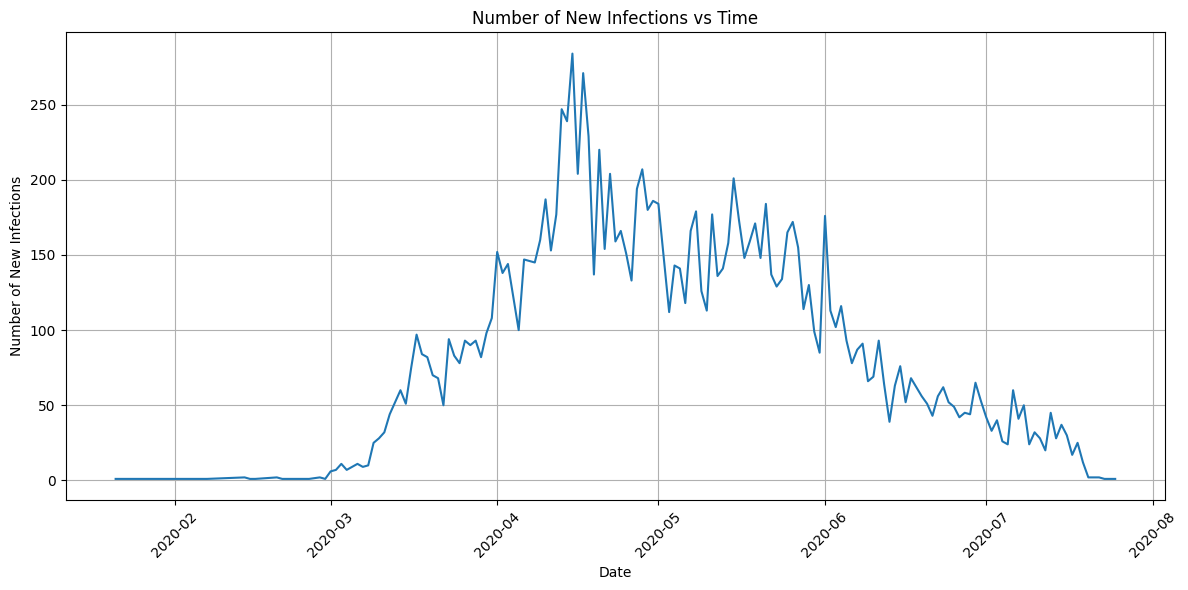

In [13]:
infections_per_day = df_cleaned['Episode Date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(infections_per_day.index, infections_per_day.values)
plt.title('Number of New Infections vs Time')
plt.xlabel('Date')
plt.ylabel('Number of New Infections')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

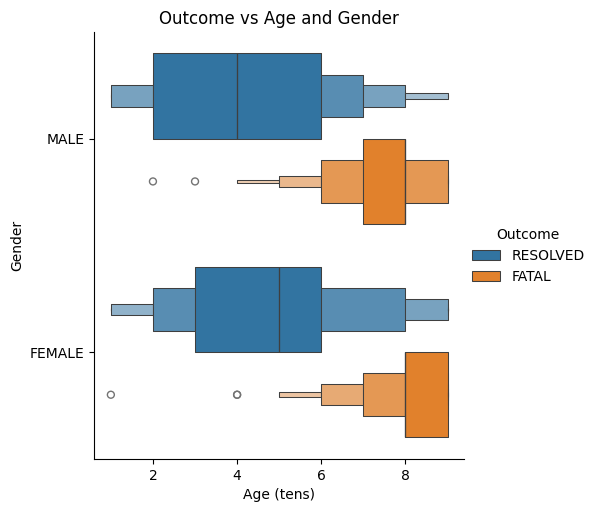

In [14]:
sns.catplot(data = df_nonull, x = "age_mapped", y = "Client Gender", hue = "Outcome", kind = "boxen").set(title='Outcome vs Age and Gender', xlabel='Age (tens)', ylabel='Gender')
fig = plt.gcf()

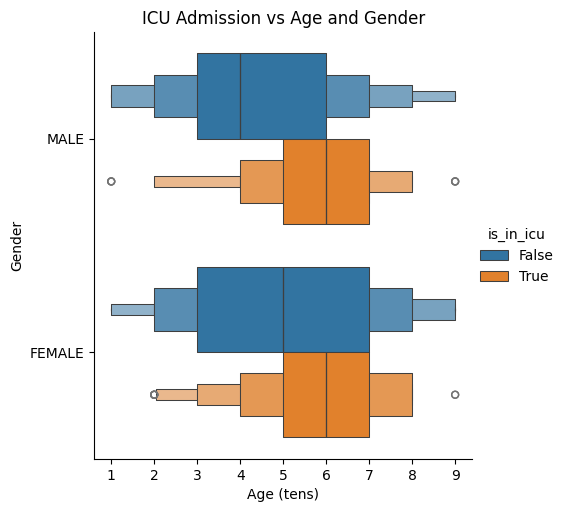

In [15]:
sns.catplot(data = df_nonull, x = "age_mapped", y = "Client Gender", hue = "is_in_icu", kind = "boxen").set(title='ICU Admission vs Age and Gender', xlabel='Age (tens)', ylabel='Gender')
fig = plt.gcf()

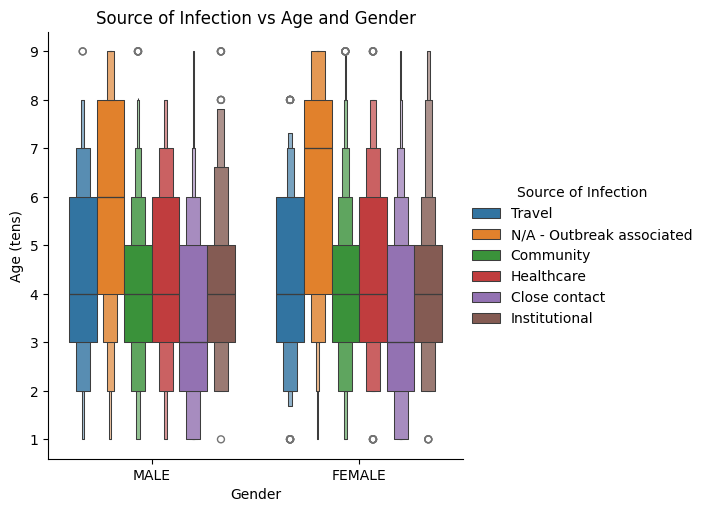

In [16]:
sns.catplot(data = df_nonull, x = "Client Gender", y = "age_mapped", hue = "Source of Infection", kind = "boxen").set(title='Source of Infection vs Age and Gender', xlabel='Gender', ylabel='Age (tens)')